# CPSC 340: Fundamentals of Learning (demo)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

### The handwritten digits data set

Load the handwritten digits data set and display one example:

In [4]:
digits = datasets.load_digits()
X, y = digits['data'], digits['target']
n, d = X.shape
print("n=",n)
print("d=",d)

n= 1797
d= 64


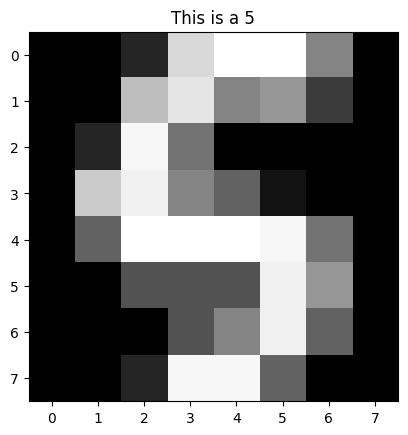

In [18]:
idx = np.random.randint(0, n) 
plt.imshow(digits['images'][idx], cmap='Greys_r')
plt.title('This is a %d' % digits['target'][idx]);

### Some EDA on feature and target values

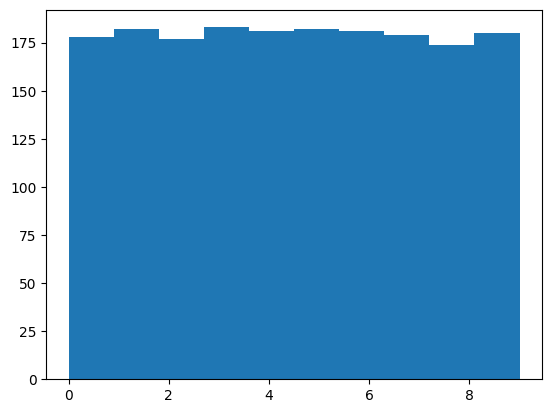

In [6]:
plt.hist(y);

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


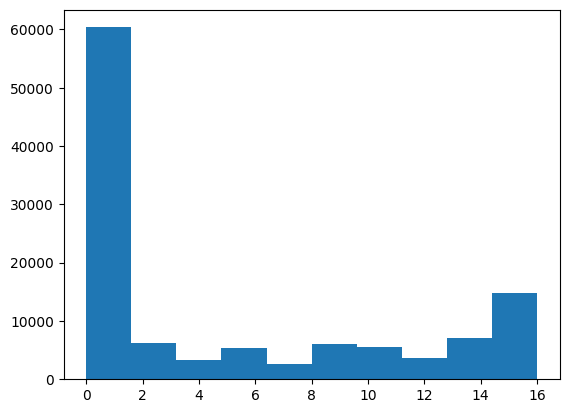

In [7]:
print(X)
plt.hist(X.flatten());

In [24]:
print(digits["images"].shape)
print(digits["data"].shape)

(1797, 8, 8)
(1797, 64)


### Decision stump (depth=1)

In [8]:
stump = DecisionTreeClassifier(max_depth=1);
stump.fit(X,y);

In [9]:
from sklearn.tree import export_graphviz
import graphviz # requires `conda install graphviz` and `pip install graphviz`

graphviz.Source(export_graphviz(stump, out_file=None, class_names=digits.target_names.astype(str), impurity=False))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [10]:
yhat = stump.predict(X)
print("Error rate:", np.sum(y!=yhat)/n) # or np.mean(y!=yhat)

Error rate: 0.80189204229271


(Random guessing would get us an error rate of 0.9.)

### Decision tree (depth=2)

In [11]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X,y)

graphviz.Source(export_graphviz(tree, out_file=None, class_names=digits.target_names.astype(str), impurity=False))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [12]:
yhat = tree.predict(X)
print("Error rate:", np.sum(y!=yhat)/n) # or np.mean(y!=yhat)

Error rate: 0.6811352253756261


### How does error rate change vs. depth?

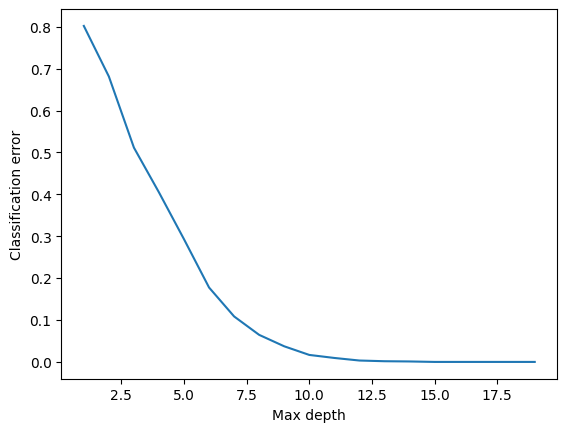

In [25]:
errors = []
depths = range(1,20)
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X,y)
    yhat = tree.predict(X)
    errors.append(np.mean(y!=yhat))
plt.plot(depths, errors)
plt.xlabel("Max depth")
plt.ylabel("Classification error");

In [26]:
errors[-1]
errors[-2]

np.float64(0.0)

### Overfitting

- With this decision tree, "training accuracy" is 1.
- It perfectly labels the data we used to make the tree.
- We are now given features for 100 new digits.
- What is the "testing accuracy" on the new data?
- How does it do on data not used to make the tree?

In [15]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

tree = DecisionTreeClassifier(max_depth=20)
tree.fit(Xtrain,ytrain)
yhat = tree.predict(Xtrain)
train_err = np.mean(ytrain!=yhat)
print("Training error,", train_err)

Training error, 0.0


In [16]:
yhat = tree.predict(Xtest)
train_err = np.mean(ytest!=yhat)
print("Test error,", train_err)

Test error, 0.16666666666666666


- Overfitting: lower accuracy on new data.
- Our rules got too specific to our exact training dataset.


### Training vs. test error

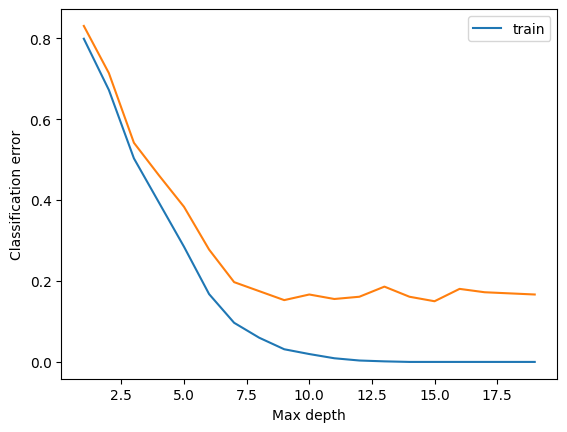

In [ ]:
train_errors = []
test_errors = []
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(Xtrain,ytrain)
    train_errors.append(np.mean(ytrain!=tree.predict(Xtrain)))
    test_errors.append(np.mean(ytest!=tree.predict(Xtest)))
plt.plot(depths, train_errors, label="train")
plt.plot(depths, test_errors, label="test")
plt.xlabel("Max depth")
plt.ylabel("Classification error")
plt.legend()